In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df=pd.read_csv("bigmart.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

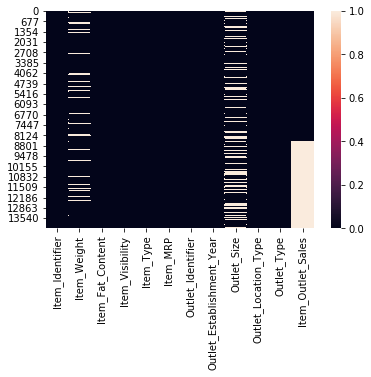

In [6]:
sns.heatmap(df.isnull())
plt.show()

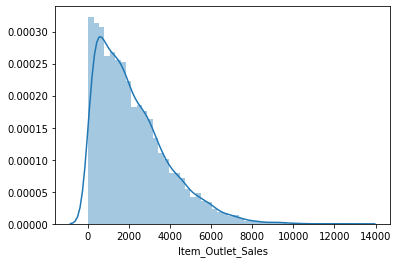

In [7]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

In [8]:
#filling missing data for categorical data
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace = True)

In [9]:
#filling missing data with imputation for numerical data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values  = np.nan, strategy = 'mean')
df['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))
df["Item_Outlet_Sales"]=imp.fit_transform(df['Item_Outlet_Sales'].values.reshape(-1,1))

In [10]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [13]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [14]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.047101,-0.096220,-0.040775,-0.012048,0.010743,-0.001089,-0.002954,0.002581,-0.002473,-0.004532,0.002220
Item_Weight,0.047101,1.000000,-0.027387,-0.013641,0.028637,0.033002,0.003274,0.000462,0.001580,-0.002104,0.001699,0.008569
Item_Fat_Content,-0.096220,-0.027387,1.000000,0.033864,-0.121140,-0.006195,-0.001733,-0.004135,-0.007084,-0.002518,-0.002380,0.007609
Item_Visibility,-0.040775,-0.013641,0.033864,1.000000,-0.035646,-0.006351,-0.106181,-0.083678,0.064836,-0.017362,-0.165726,-0.099903
Item_Type,-0.012048,0.028637,-0.121140,-0.035646,1.000000,0.043948,0.001126,0.003061,-0.002608,0.002083,0.004305,0.013194
Item_MRP,0.010743,0.033002,-0.006195,-0.006351,0.043948,1.000000,-0.000555,0.000141,-0.001018,0.000838,0.000136,0.440979
Outlet_Identifier,-0.001089,0.003274,-0.001733,-0.106181,0.001126,-0.000555,1.000000,0.079047,0.504580,-0.716151,0.099899,0.125742
Outlet_Establishment_Year,-0.002954,0.000462,-0.004135,-0.083678,0.003061,0.000141,0.079047,1.000000,0.193392,-0.089328,-0.122519,-0.038061
Outlet_Size,0.002581,0.001580,-0.007084,0.064836,-0.002608,-0.001018,0.504580,0.193392,1.000000,-0.614300,-0.201505,-0.066760
Outlet_Location_Type,-0.002473,-0.002104,-0.002518,-0.017362,0.002083,0.000838,-0.716151,-0.089328,-0.614300,1.000000,0.467251,0.069224


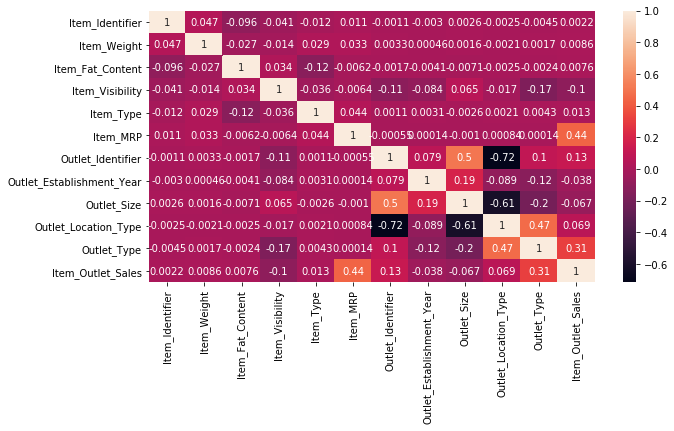

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

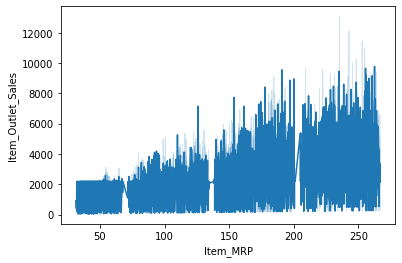

In [16]:
sns.lineplot(x ='Item_MRP', y = 'Item_Outlet_Sales', data = df)
plt.show()

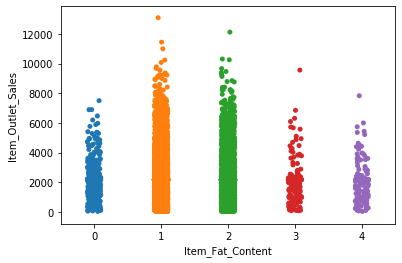

In [17]:
sns.stripplot(x = df['Item_Fat_Content'], y = df['Item_Outlet_Sales'], data = df)
plt.show()

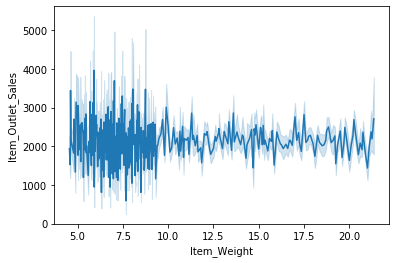

In [18]:
sns.lineplot(x = df['Item_Weight'], y = df['Item_Outlet_Sales'], data = df)
plt.show()

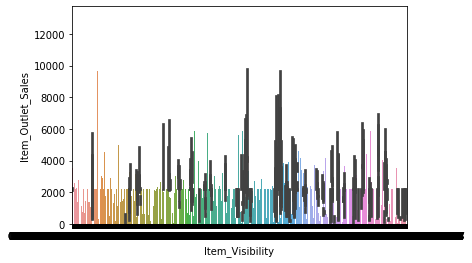

In [19]:
sns.barplot(x = df['Item_Visibility'], y = df['Item_Outlet_Sales'], data = df)
plt.show()

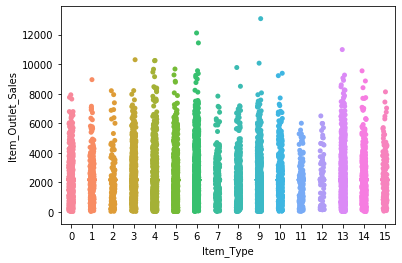

In [20]:
sns.stripplot(x = df['Item_Type'], y = df['Item_Outlet_Sales'], data = df)
plt.show()

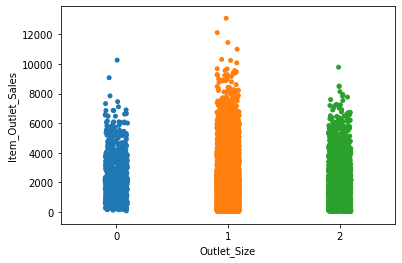

In [21]:
sns.stripplot(x = df['Outlet_Size'], y = df['Item_Outlet_Sales'], data = df)
plt.show()

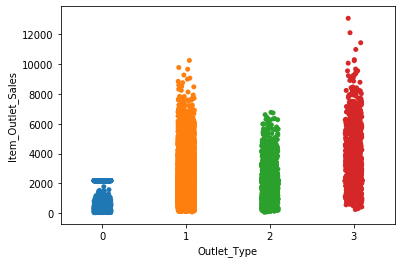

In [22]:
sns.stripplot(x = df['Outlet_Type'], y = df['Item_Outlet_Sales'], data = df)
plt.show()

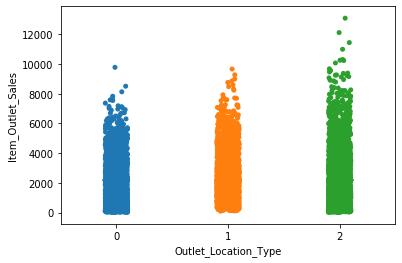

In [23]:
sns.stripplot(x = df['Outlet_Location_Type'], y = df['Item_Outlet_Sales'], data = df)
plt.show()

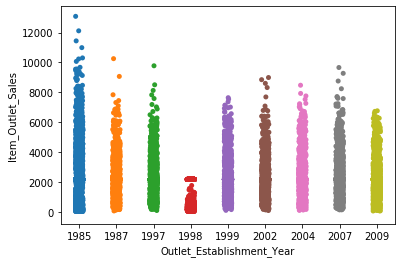

In [24]:
sns.stripplot(x = df['Outlet_Establishment_Year'], y = df['Item_Outlet_Sales'], data = df)
plt.show()

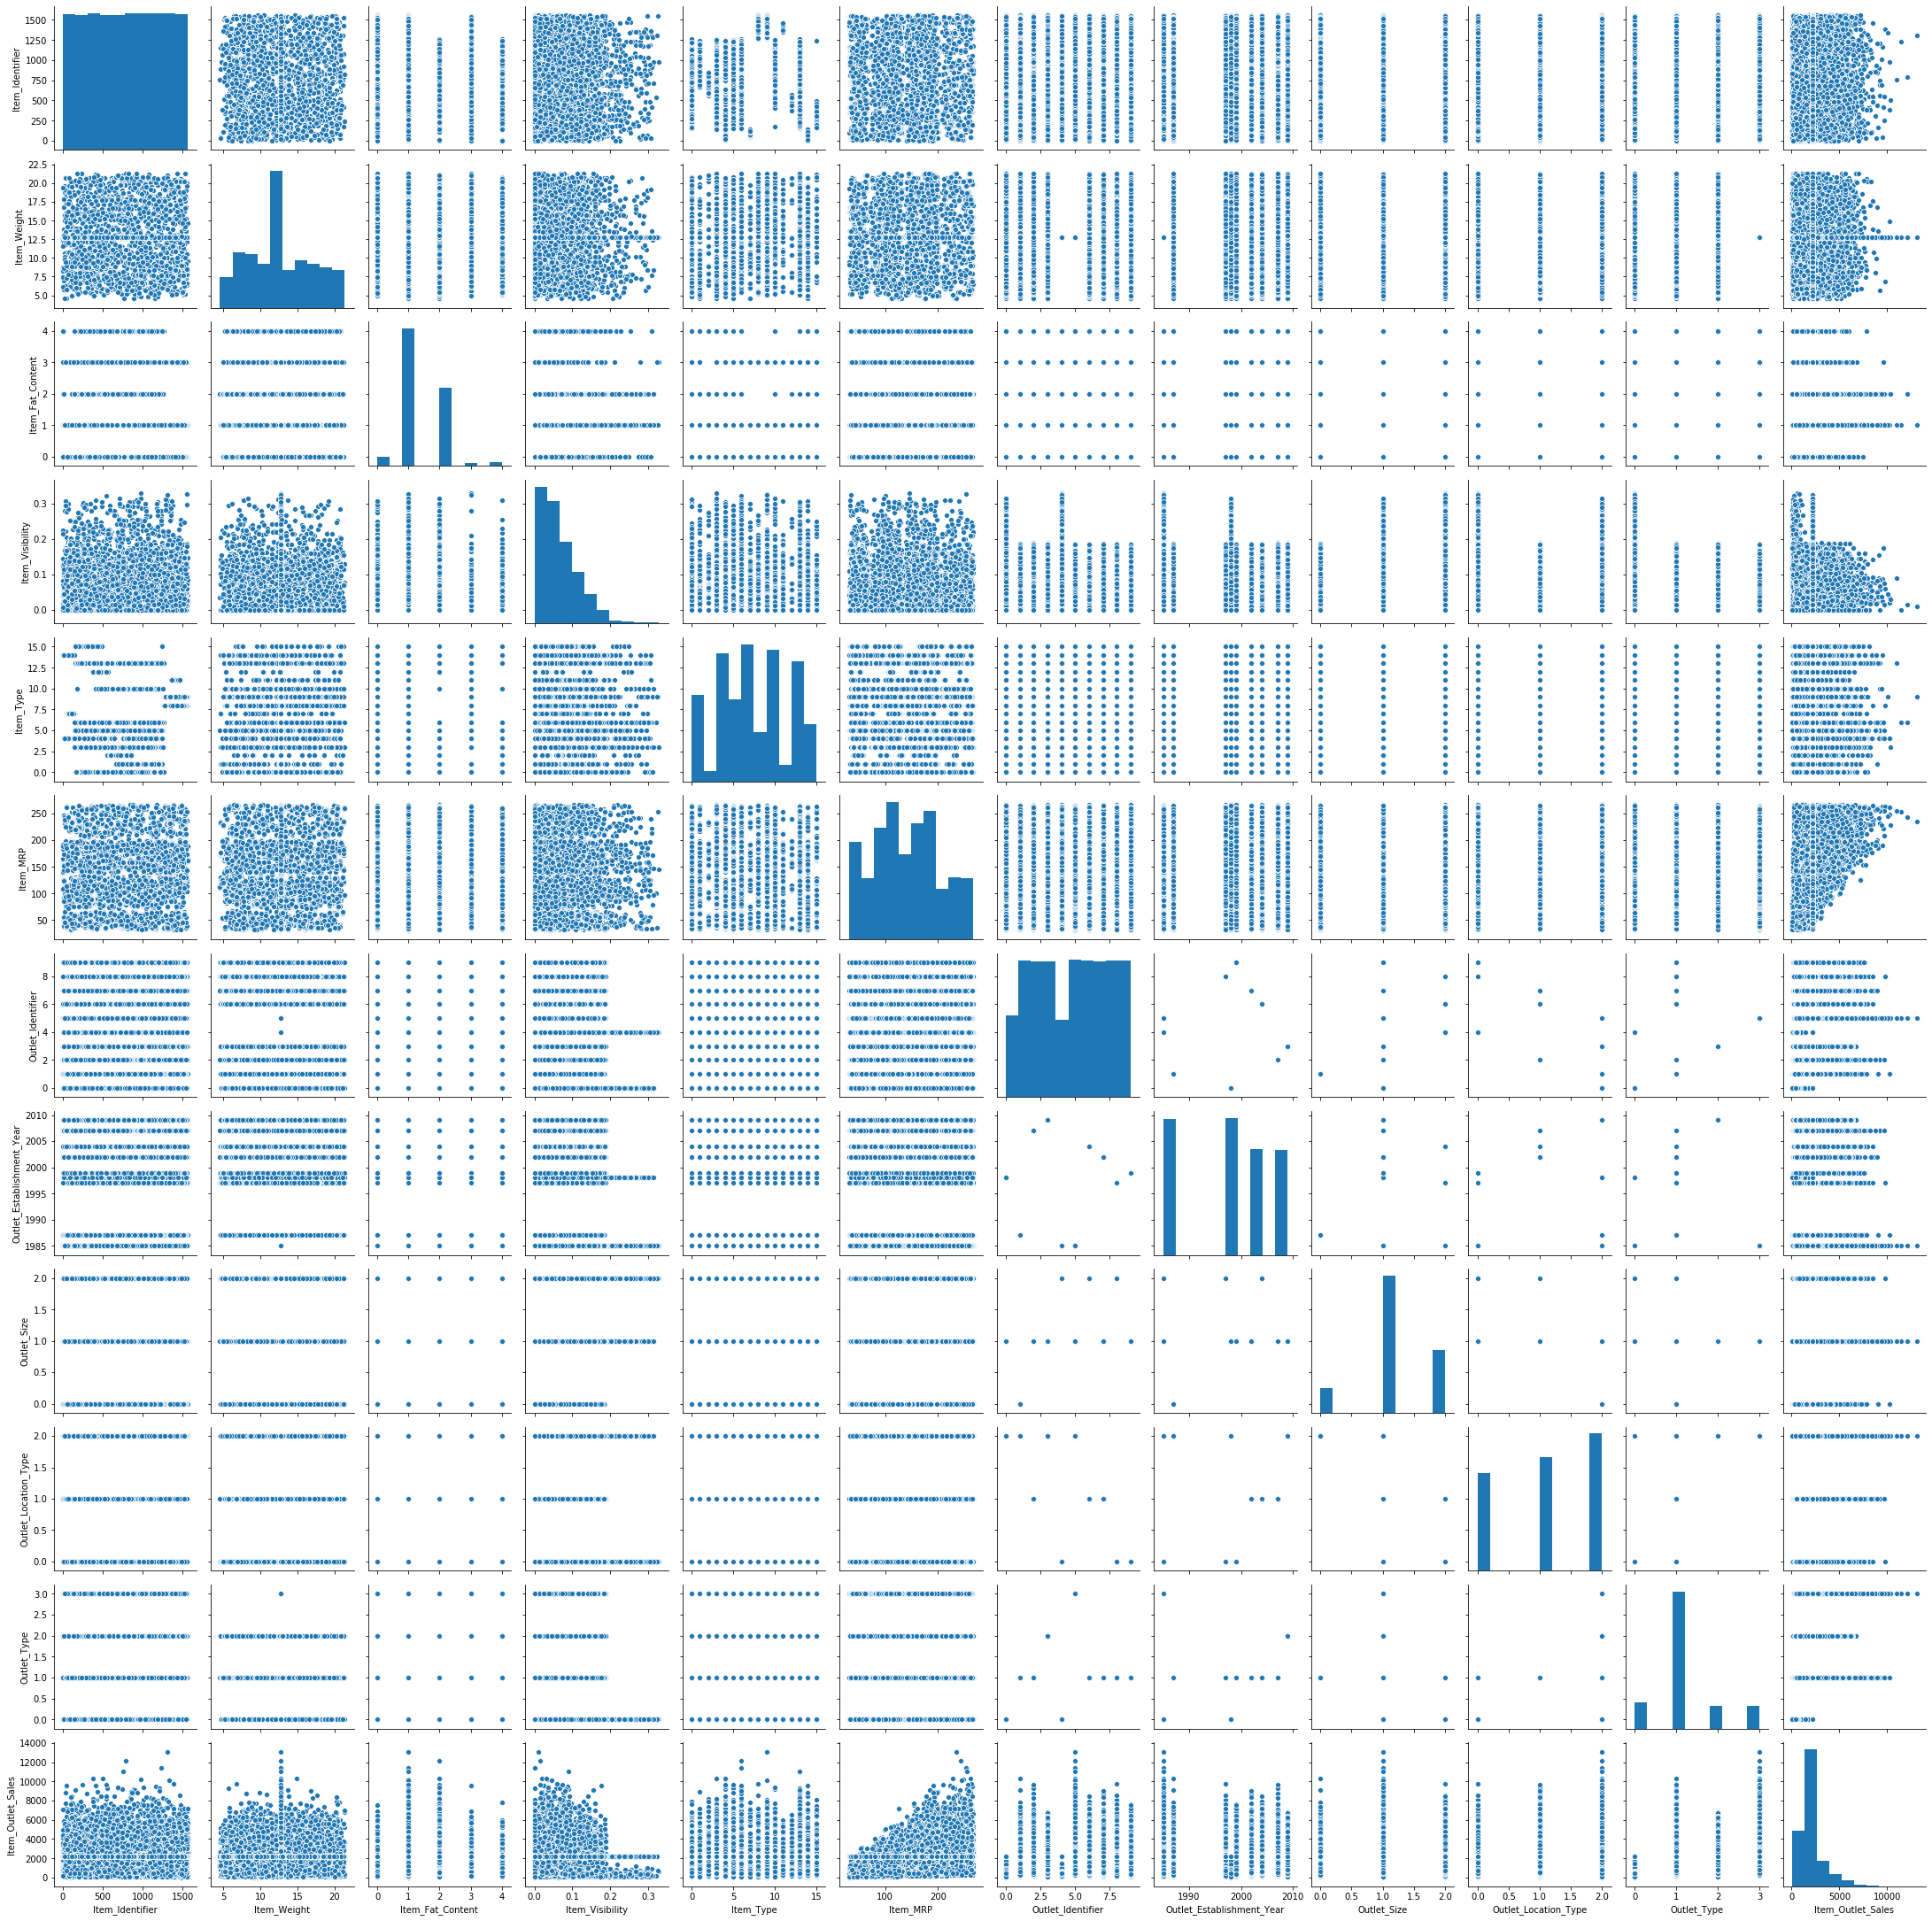

In [25]:
sns.pairplot(df)
plt.show()

In [26]:
df.skew()

Item_Identifier             -0.004897
Item_Weight                  0.111314
Item_Fat_Content             0.996640
Item_Visibility              1.195175
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year   -0.396465
Outlet_Size                 -0.087077
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.520025
dtype: float64

In [27]:
# handling skewness
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.sqrt(df[col])

In [28]:
df.skew()

Item_Identifier             -0.004897
Item_Weight                  0.111314
Item_Fat_Content            -1.079873
Item_Visibility             -0.096758
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year   -0.396465
Outlet_Size                 -0.087077
Outlet_Location_Type        -0.209053
Outlet_Type                 -0.812912
Item_Outlet_Sales           -0.013085
dtype: float64

In [29]:
 dx=df.iloc[:,0:-1]
dx.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,1.000000,0.126678,4,249.8092,9,1999,1,0,1.000000
1,8,5.92,1.414062,0.138846,14,48.2692,3,2009,1,2,1.414062
2,662,17.50,1.000000,0.129461,10,141.6180,9,1999,1,0,1.000000
3,1121,19.20,1.414062,0.000000,6,182.0950,0,1998,1,2,0.000000
4,1297,8.93,1.000000,0.000000,9,53.8614,1,1987,0,2,1.000000


In [30]:
y=df.iloc[:,-1]
y.head()

0    61.115775
1    21.057607
2    45.795961
3    27.062520
4    31.538947
Name: Item_Outlet_Sales, dtype: float64

In [31]:
# standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(dx)
x=pd.DataFrame(x,columns=dx.columns)
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-1.388320,-0.824939,-0.402218,-0.997847,-0.766467,1.752511,1.507764,0.139681,-0.284644,-1.369286,0.003582
1,-1.717498,-1.623224,0.911405,-0.884136,1.606957,-1.493696,-0.607145,1.334228,-0.284644,1.091566,0.918956
2,-0.262885,1.111729,-0.402218,-0.971842,0.657587,0.009874,1.507764,0.139681,-0.284644,-1.369286,0.003582
3,0.758014,1.513233,0.911405,-2.181654,-0.291782,0.661838,-1.664600,0.020226,-0.284644,1.091566,-2.207132
4,1.149470,-0.912325,-0.402218,-2.181654,0.420245,-1.403623,-1.312115,-1.293777,-1.950518,1.091566,0.003582


In [32]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [33]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  66  is  0.3882594248806739


In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

-7.85972615801833e+29

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=66)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [36]:
print("error:")
print("r2 score is: ",r2_score(y_test,y_pred))
print("root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

error:
r2 score is:  0.3882594248806739
root Mean squared error:  11.326812740889832


In [37]:
from sklearn.externals import joblib

In [38]:
joblib.dump(lreg,'bigmart.pkl')

['bigmart.pkl']

In [39]:
model=joblib.load('bigmart.pkl')

In [40]:
model.predict(x_test.head())

array([39.86175277, 45.87378642, 46.27899823, 34.78215538, 48.27940223])

In [41]:
y_test.head()

5945     40.098716
5576     40.953024
8361     37.285257
11762    46.704271
10176    46.704271
Name: Item_Outlet_Sales, dtype: float64